In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
channel_spend = pd.read_csv('channel_spend_graduate.csv')
channel_spend

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [3]:
import pickle
subscribers = pd.read_pickle('subscribers')
engagement = pd.read_pickle('engagement')
rep = pd.read_pickle('customer_service_reps')

# Data Preprocessing

# Engagement

In [4]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [5]:
# Merge the people with same unique subscriber id together
engagement_mean = engagement.groupby('subid').mean().reset_index()
engagement_mean.head()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,20000062,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,0.000000
1,20000405,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,0.000000
2,20000604,0.933333,0.333333,0.533333,4.533333,0.0,0.066667,0.133333
3,20000685,1.210526,0.263158,0.368421,4.342105,0.0,0.210526,0.657895
4,20000741,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,0.000000


# Channel Spend

In [6]:
print(channel_spend.shape)
channel_spend.head()

(40, 3)


,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


# Subscribers

In [118]:
print(subscribers.shape)
subscribers.head()

(227628, 29)


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


# Deal with null value for categorical varibles

In [119]:
subscribers.isnull().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
retarget_TF                          0
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
creation_until_cancel_days       75860
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                      34904
join_fee                         34904
language                 

In [120]:
subscribers['package_type'].fillna('not_specified', inplace=True)
subscribers['preferred_genre'].fillna('not_specified', inplace=True)
subscribers['intended_use'].fillna('not_specified', inplace=True)
subscribers['attribution_survey'].fillna('not_specified', inplace=True)
subscribers['op_sys'].fillna('not_specified', inplace=True)
subscribers['payment_type'].fillna('not_specified', inplace=True)
subscribers['male_TF'].fillna('not_specified', inplace=True)

In [121]:
subscribers.num_weekly_services_utilized.fillna(0, inplace=True) # NaN means no seervices used for that week
subscribers['weekly_consumption_hour'].fillna(0, inplace=True) # NaN means no consumption
subscribers.num_ideal_streaming_services.fillna(0, inplace=True)
subscribers.age.fillna(0, inplace=True)
subscribers.creation_until_cancel_days.fillna(0, inplace=True)
subscribers.revenue_net.fillna(0, inplace=True)
subscribers['join_fee'].fillna(0, inplace=True) # NaN assumes no join fee

In [122]:
subscribers.isnull().sum()

subid                           0
package_type                    0
num_weekly_services_utilized    0
preferred_genre                 0
intended_use                    0
weekly_consumption_hour         0
num_ideal_streaming_services    0
retarget_TF                     0
age                             0
male_TF                         0
country                         0
attribution_technical           0
attribution_survey              0
op_sys                          0
months_per_bill_period          0
plan_type                       0
monthly_price                   0
discount_price                  0
account_creation_date           0
creation_until_cancel_days      0
cancel_before_trial_end         0
trial_end_date                  0
initial_credit_card_declined    0
revenue_net                     0
join_fee                        0
language                        0
paid_TF                         0
refund_after_trial_TF           0
payment_type                    0
dtype: int64

# Deal with abnormal values for numerical variable

In [123]:
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,227628.000000,227628.000000,227628.000000,2.276280e+05,227628.0,227628.000000,227628.000000,227628.000000,227628.000000,227628.000000
mean,2.498624e+07,1.543598,23.332421,1.014367,6.408667e+02,4.0,4.732049,4.512188,11.048386,1.318552,0.097489
std,2.885543e+06,1.592010,11.379402,1.015490,1.765648e+05,0.0,0.101049,0.097078,30.240349,2.878973,0.168040
min,2.000001e+07,0.000000,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,0.000000,22.951579,0.000000,2.800000e+01,4.0,4.734300,4.514100,0.000000,0.000000,0.000000
50%,2.497011e+07,2.158123,25.851492,1.730242,4.200000e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
75%,2.749020e+07,2.773761,30.201361,1.910251,5.500000e+01,4.0,4.734300,4.514100,11.000000,0.000000,0.036700
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [124]:
# Based on the describe() function, for num_weekly_services_utilized
# The value for 75% is around 3, for more targeted people purpose
# Choose the range from 0 to 5
subscribers = subscribers[(subscribers.num_weekly_services_utilized >= 0) & (subscribers.num_weekly_services_utilized <= 5)]
# The value for 75% is around 30, for more targeted people purpose
# Choose the range from 0 to 50
subscribers = subscribers[(subscribers.weekly_consumption_hour >= 0) & (subscribers.weekly_consumption_hour <= 50)]
# Only keep the value that is greater than 0
subscribers = subscribers[(subscribers.num_ideal_streaming_services) >= 0]
# Delete age <= 0 and age > 100
subscribers = subscribers[(subscribers.age < 100) & (subscribers.age > 0)| (subscribers.age == -999)]
subscribers = subscribers[(subscribers.creation_until_cancel_days >= 0) | (subscribers.creation_until_cancel_days == -999)]
subscribers = subscribers[(subscribers.join_fee >= 0)]

In [125]:
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,1.887100e+05,188710.000000,188710.000000,188710.000000,188710.000000,188710.0,188710.000000,188710.000000,188710.000000,188710.000000,188710.000000
mean,2.498776e+07,1.776983,27.510624,1.180703,46.218819,4.0,4.731776,4.511974,10.824842,1.545632,0.115164
std,2.884464e+06,1.521198,5.818307,0.987319,13.982871,0.0,0.107709,0.103540,27.761945,3.060893,0.176844
min,2.000001e+07,0.000000,0.000000,0.000000,10.000000,4.0,0.807400,0.770700,0.000000,-5.982100,0.000000
25%,2.248982e+07,0.000000,24.401536,0.000000,35.000000,4.0,4.734300,4.514100,0.000000,0.000000,0.036700
50%,2.497431e+07,2.405557,27.301448,1.853364,46.000000,4.0,4.734300,4.514100,4.000000,0.000000,0.036700
75%,2.748952e+07,2.847402,30.201361,1.919817,57.000000,4.0,4.734300,4.514100,11.000000,1.357900,0.110100
max,2.999998e+07,4.999189,49.050793,3.380440,99.000000,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [126]:
print(subscribers.shape)

(188710, 29)


In [127]:
subscribers.account_creation_date = subscribers.account_creation_date.apply(lambda x:pd.to_datetime(x))

# Check categorical data

In [128]:
print('gender','\n',subscribers.male_TF.value_counts(),'\n')
print('op_sys','\n',subscribers.op_sys.value_counts(),'\n')
print('language','\n',subscribers.language.value_counts(),'\n')
print('country','\n',subscribers.country.value_counts(),'\n')
print('intended_use\n',subscribers.intended_use.value_counts(),'\n')
print('package_type\n',subscribers.package_type.value_counts(),'\n')
print('preferred_genre\n',subscribers.preferred_genre.value_counts(),'\n')
print('num_ideal_streaming_services\n',subscribers.num_ideal_streaming_services.value_counts(),'\n')

gender 
 False            165021
True              23685
not_specified         4
Name: male_TF, dtype: int64 

op_sys 
 iOS              114925
Android           60879
not_specified     12906
Name: op_sys, dtype: int64 

language 
 ar    188710
Name: language, dtype: int64 

country 
 UAE    188710
Name: country, dtype: int64 

intended_use
 access to exclusive content    68551
replace OTT                    55546
supplement OTT                 22902
expand regional access         13701
expand international access    12769
other                           6761
education                       5042
not_specified                   3438
Name: intended_use, dtype: int64 

package_type
 base             85627
enhanced         52607
not_specified    34823
economy          15653
Name: package_type, dtype: int64 

preferred_genre
 comedy           96375
drama            39046
not_specified    35565
regional          8339
international     5714
other             3671
Name: preferred_genre, dtype:

In [129]:
subscribers['age_range'] = subscribers.age.apply(lambda x:'unknown' if x == 0 else('<18' if x < 18 else('18-24' if x < 25 else ( '25-34' if x < 35 else ('35-44' if x < 45 else('45-54' if x < 55 else ('55-64' if x < 65 else '>65')))))))

In [130]:
subscribers.age_range.value_counts()

45-54    44953
35-44    42709
55-64    36320
25-34    33556
>65      20444
18-24    10724
<18          4
Name: age_range, dtype: int64

In [131]:
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,age_range
380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,...,False,2020-03-16,False,0.0000,0.3303,ar,False,False,not_specified,>65
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-22,False,0.0000,0.1101,ar,False,False,not_specified,25-34
356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,...,False,2020-02-11,False,0.0000,0.0367,ar,False,False,not_specified,25-34
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0000,0.0367,ar,False,False,not_specified,25-34
284782,24810928,base,0.000000,comedy,access to exclusive content,20.051667,0.000000,False,70.0,False,...,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK,>65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603751,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,...,False,2020-01-16,False,0.0000,0.0000,ar,False,False,not_specified,35-44
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,False,2019-12-02,False,0.0000,0.3303,ar,False,False,not_specified,35-44
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,45-54
281340,24799085,base,0.000000,comedy,access to exclusive content,31.651317,0.000000,False,45.0,False,...,True,2020-01-05,True,0.0000,0.0367,ar,False,False,not_specified,45-54


# Rep

In [21]:
rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB


In [22]:
rep.describe()

,customer_service_rep_id,subid,num_trial_days,revenue_net_1month,payment_period
count,2.208643e+06,2.208643e+06,2.208643e+06,2.208643e+06,2.208643e+06
mean,3.504146e+07,2.499531e+07,1.298418e+01,2.248010e+00,5.850402e-01
std,2.808791e+06,2.887118e+06,3.102689e+00,2.222221e+00,1.003588e+00
min,3.000466e+07,2.000000e+07,0.000000e+00,-7.596900e+00,0.000000e+00
25%,3.273768e+07,2.249642e+07,1.400000e+01,0.000000e+00,0.000000e+00
50%,3.500128e+07,2.499127e+07,1.400000e+01,1.137700e+00,0.000000e+00
75%,3.739152e+07,2.749480e+07,1.400000e+01,4.587500e+00,1.000000e+00
max,3.999743e+07,3.000000e+07,1.400000e+01,1.038610e+01,1.200000e+01


In [23]:
rep

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [24]:
rep.subid.value_counts()

20890160    13
26463599    13
23509022    13
26854692    12
20272343    11
            ..
27960049     1
26073187     1
22152433     1
29845367     1
22439286     1
Name: subid, Length: 1369360, dtype: int64

# Customer Segmentation

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [26]:
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,age_range
380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,...,False,2020-03-16,False,0.0,0.3303,ar,False,False,not_specified,>65
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-22,False,0.0,0.1101,ar,False,False,not_specified,25-34
356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,...,False,2020-02-11,False,0.0,0.0367,ar,False,False,not_specified,25-34
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0,0.0367,ar,False,False,not_specified,25-34
284782,24810928,base,0.000000,comedy,access to exclusive content,20.051667,0.000000,False,70.0,False,...,True,2020-03-18,False,0.0,0.3303,ar,True,True,RAKBANK,>65


In [240]:
seg_sub = subscribers[['package_type', 'preferred_genre', 'weekly_consumption_hour', 'age_range','age', 'male_TF', 'op_sys', 'plan_type']]

In [241]:
seg_sub

,package_type,preferred_genre,weekly_consumption_hour,age_range,age,male_TF,op_sys,plan_type
380374,base,comedy,22.951579,>65,70.0,False,not_specified,base_uae_14_day_trial
496617,enhanced,regional,36.001186,25-34,25.0,True,iOS,base_uae_14_day_trial
356799,base,drama,20.051667,25-34,30.0,False,Android,base_uae_14_day_trial
681701,base,comedy,22.951579,25-34,28.0,False,iOS,base_uae_14_day_trial
284782,base,comedy,20.051667,>65,70.0,False,not_specified,base_uae_14_day_trial
...,...,...,...,...,...,...,...,...
603751,base,drama,24.401536,35-44,43.0,False,iOS,base_uae_14_day_trial
509326,enhanced,comedy,28.751405,35-44,38.0,False,iOS,base_uae_14_day_trial
229587,enhanced,comedy,27.301448,45-54,49.0,False,iOS,base_uae_14_day_trial
281340,base,comedy,31.651317,45-54,45.0,False,iOS,base_uae_14_day_trial


In [243]:
seg_sub = seg_sub[seg_sub['age'] >= 18]
seg_sub = seg_sub[seg_sub['preferred_genre'] != 'not_specified']
seg_sub = seg_sub[seg_sub['op_sys'] != 'not_specified']
seg_sub = seg_sub[seg_sub['weekly_consumption_hour'] != 0]
seg_sub = seg_sub[seg_sub['package_type'] != 'not_specified']
seg_sub = seg_sub[seg_sub['male_TF'] != 'not_specified']
seg_sub

,package_type,preferred_genre,weekly_consumption_hour,age_range,age,male_TF,op_sys,plan_type
496617,enhanced,regional,36.001186,25-34,25.0,True,iOS,base_uae_14_day_trial
356799,base,drama,20.051667,25-34,30.0,False,Android,base_uae_14_day_trial
681701,base,comedy,22.951579,25-34,28.0,False,iOS,base_uae_14_day_trial
192823,base,comedy,20.051667,55-64,61.0,False,Android,base_uae_14_day_trial
315863,base,drama,34.551230,18-24,23.0,False,iOS,base_uae_14_day_trial
...,...,...,...,...,...,...,...,...
603751,base,drama,24.401536,35-44,43.0,False,iOS,base_uae_14_day_trial
509326,enhanced,comedy,28.751405,35-44,38.0,False,iOS,base_uae_14_day_trial
229587,enhanced,comedy,27.301448,45-54,49.0,False,iOS,base_uae_14_day_trial
281340,base,comedy,31.651317,45-54,45.0,False,iOS,base_uae_14_day_trial


In [244]:
seg_sub['age_range'].value_counts()

45-54    33599
35-44    33071
55-64    26490
25-34    26270
>65      13878
18-24     8611
Name: age_range, dtype: int64

In [245]:
seg_sub['male_TF'].value_counts()

False    123317
True      18602
Name: male_TF, dtype: int64

In [246]:
seg_sub['preferred_genre'].value_counts()

comedy           90277
drama            35181
regional          7965
international     5006
other             3490
Name: preferred_genre, dtype: int64

In [247]:
seg_sub['package_type'].value_counts()

base        78849
enhanced    49460
economy     13610
Name: package_type, dtype: int64

In [248]:
seg_sub['plan_type'].value_counts()

base_uae_14_day_trial    141610
high_uae_14_day_trial       291
base_eur_14_day_trial         7
high_sar_14_day_trial         5
low_gbp_14_day_trial          4
high_aud_14_day_trial         2
Name: plan_type, dtype: int64

In [30]:
seg_sub.describe()

,weekly_consumption_hour,age
count,141919.000000,141919.000000
mean,27.976275,45.579219
std,4.821042,13.842885
min,2.652191,18.000000
25%,24.401536,35.000000
50%,27.301448,45.000000
75%,30.201361,56.000000
max,49.050793,99.000000


# Feature engineering via get_dummies()

In [31]:
seg_sub_dummy = seg_sub.join(pd.get_dummies(seg_sub[['package_type', 'preferred_genre', 'male_TF','op_sys','plan_type']]))
del seg_sub_dummy['preferred_genre']
del seg_sub_dummy['package_type']
del seg_sub_dummy['male_TF']
del seg_sub_dummy['op_sys']
del seg_sub_dummy['plan_type']
seg_sub_dummy

,weekly_consumption_hour,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
496617,36.001186,25.0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
356799,20.051667,30.0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
681701,22.951579,28.0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
192823,20.051667,61.0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
315863,34.551230,23.0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603751,24.401536,43.0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
509326,28.751405,38.0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
229587,27.301448,49.0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
281340,31.651317,45.0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0


# Normalization

In [32]:
scaler = preprocessing.StandardScaler()

seg_sub_dummy_scale = pd.DataFrame(scaler.fit_transform(seg_sub_dummy[['age','weekly_consumption_hour']])).rename(columns={0:'age_scale',1:'weekly_consumption_hour_scale'})

seg_sub_dummy_reindex = seg_sub_dummy.reset_index(drop=True)
seg_sub_dummy_scale = pd.concat([seg_sub_dummy_scale,seg_sub_dummy_reindex],axis=1)
seg_sub_dummy_scale.drop(columns=['age','weekly_consumption_hour'],inplace=True)

In [33]:
seg_sub_dummy_scale

,age_scale,weekly_consumption_hour_scale,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
0,-1.486633,1.664565,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
1,-1.125435,-1.643760,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
2,-1.269915,-1.042246,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,1.113990,-1.643760,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
4,-1.631112,1.363808,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141914,-0.186322,-0.741490,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
141915,-0.547519,0.160781,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
141916,0.247116,-0.139976,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
141917,-0.041843,0.762295,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0


# Find the best value of cluster via Elbow

In [249]:
#define function to find the best k number        
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia(Lower is better)')
    plt.title('Determination of number of clusters via Elbow Method')
    plt.savefig('elbowmethod.png')
    plt.show()
    return 

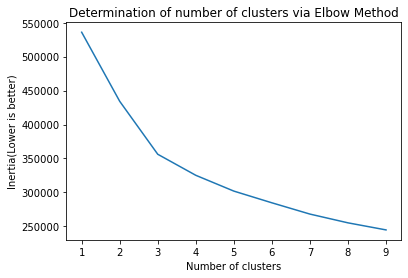

In [250]:
fitting(seg_sub_dummy_scale)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(seg_sub_dummy_scale) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-2.302486,-1.123859
1,1.368769,-1.182477
2,0.803395,-1.425225
3,1.871867,0.788736
4,-1.551131,-1.139406


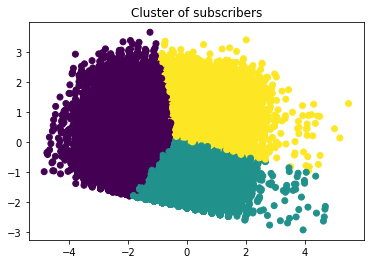

In [37]:
plt.scatter(X_principal['P1'], X_principal['P2'],   
           c = KMeans(n_clusters = 3).fit_predict(X_principal)) 
plt.title('Cluster of subscribers')
plt.show() 

In [38]:
# add clusters into the data table

kmeans = KMeans(n_clusters = 3, random_state=799).fit(seg_sub_dummy_scale.reset_index(drop=True))

km_label = pd.DataFrame(kmeans.labels_,columns=['cluster'])
# km_label = list(kmeans3.labels_)
# segment_df_dummy['cluster'] = km_label
segment_df_km = pd.concat([seg_sub_dummy.reset_index(drop=True),km_label],axis=1)

segment_summary = segment_df_km.groupby('cluster')
avg_segment_summary = segment_summary.mean()
avg_segment_summary
#round(segment_summary.mean(),2)

,weekly_consumption_hour,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
cluster,,,,,,,,,,,,,,,,,,,,
0,26.457297,33.832202,0.503907,0.059934,0.436160,0.708804,0.177535,0.023794,0.022255,0.067611,0.983123,0.016877,0.331665,0.668335,0.000085,0.997463,0.000017,0.000017,0.002384,0.000034
1,26.115102,57.755953,0.624900,0.129671,0.245429,0.597681,0.296674,0.045340,0.025667,0.034638,0.982877,0.017123,0.365148,0.634852,0.000018,0.997770,0.000018,0.000036,0.002123,0.000036
2,35.242458,46.025896,0.524549,0.104633,0.370818,0.555909,0.301250,0.039555,0.027505,0.075780,0.377142,0.622858,0.352631,0.647369,0.000037,0.998728,0.000000,0.000075,0.001160,0.000000


In [39]:
avg_segment_summary['Cluster']=[0,1,2]
avg_segment_summary

,weekly_consumption_hour,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,male_TF_True,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,Cluster
cluster,,,,,,,,,,,,,,,,,,,,,
0,26.457297,33.832202,0.503907,0.059934,0.436160,0.708804,0.177535,0.023794,0.022255,0.067611,...,0.016877,0.331665,0.668335,0.000085,0.997463,0.000017,0.000017,0.002384,0.000034,0
1,26.115102,57.755953,0.624900,0.129671,0.245429,0.597681,0.296674,0.045340,0.025667,0.034638,...,0.017123,0.365148,0.634852,0.000018,0.997770,0.000018,0.000036,0.002123,0.000036,1
2,35.242458,46.025896,0.524549,0.104633,0.370818,0.555909,0.301250,0.039555,0.027505,0.075780,...,0.622858,0.352631,0.647369,0.000037,0.998728,0.000000,0.000075,0.001160,0.000000,2


In [40]:
avg_segment_summary['Cluster'] +=1
avg_segment_summary.head()

,weekly_consumption_hour,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,male_TF_True,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,Cluster
cluster,,,,,,,,,,,,,,,,,,,,,
0,26.457297,33.832202,0.503907,0.059934,0.436160,0.708804,0.177535,0.023794,0.022255,0.067611,...,0.016877,0.331665,0.668335,0.000085,0.997463,0.000017,0.000017,0.002384,0.000034,1
1,26.115102,57.755953,0.624900,0.129671,0.245429,0.597681,0.296674,0.045340,0.025667,0.034638,...,0.017123,0.365148,0.634852,0.000018,0.997770,0.000018,0.000036,0.002123,0.000036,2
2,35.242458,46.025896,0.524549,0.104633,0.370818,0.555909,0.301250,0.039555,0.027505,0.075780,...,0.622858,0.352631,0.647369,0.000037,0.998728,0.000000,0.000075,0.001160,0.000000,3


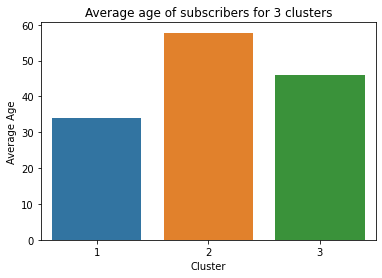

In [41]:
import seaborn as sns
sns.barplot(x='Cluster',y='age',data=avg_segment_summary).set(title='Average age of subscribers for 3 clusters')
plt.ylabel("Average Age")
plt.show()

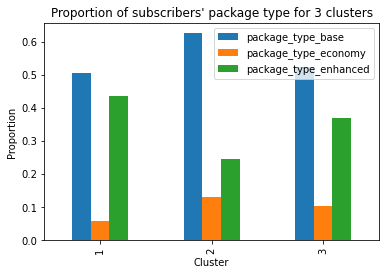

In [42]:
avg_segment_summary.plot(x="Cluster", y=['package_type_base', 'package_type_economy', 'package_type_enhanced'], kind="bar")
plt.title("Proportion of subscribers' package type for 3 clusters")
plt.ylabel("Proportion")
plt.show()

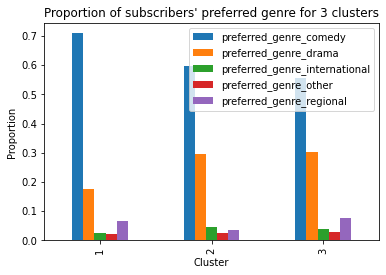

In [43]:
avg_segment_summary.plot(x="Cluster", y=['preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international',
                                        'preferred_genre_other', 'preferred_genre_regional'], kind="bar")
plt.title("Proportion of subscribers' preferred genre for 3 clusters")
plt.ylabel("Proportion")
plt.show()

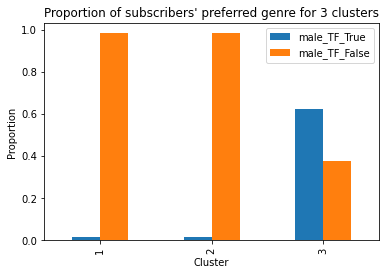

In [44]:
avg_segment_summary.plot(x="Cluster", y=['male_TF_True', 'male_TF_False'], kind="bar")
plt.title("Proportion of subscribers' preferred genre for 3 clusters")
plt.ylabel("Proportion")
plt.show()

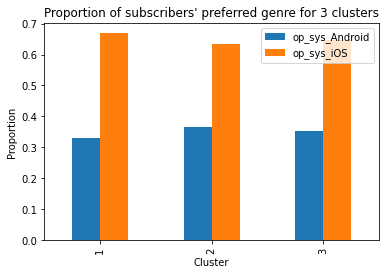

In [45]:
avg_segment_summary.plot(x="Cluster", y=['op_sys_Android', 'op_sys_iOS'], kind="bar")
plt.title("Proportion of subscribers' preferred genre for 3 clusters")
plt.ylabel("Proportion")
plt.show()

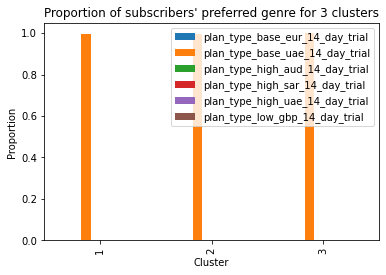

In [46]:
avg_segment_summary.plot(x="Cluster", y=['plan_type_base_eur_14_day_trial', 'plan_type_base_uae_14_day_trial',
                                        'plan_type_high_aud_14_day_trial','plan_type_high_sar_14_day_trial',
                                        'plan_type_high_uae_14_day_trial', 'plan_type_low_gbp_14_day_trial'], kind="bar")
plt.title("Proportion of subscribers' preferred genre for 3 clusters")
plt.ylabel("Proportion")
plt.show()

# Allocation

In [47]:
subscribers_allocation = pd.DataFrame()
subscribers_allocation['subid'] = subscribers.subid.copy()
subscribers_allocation['account_creation_date'] = subscribers.account_creation_date.apply(lambda x: pd.to_datetime(x)).copy()
subscribers_allocation['account_creation_month'] = subscribers_allocation.account_creation_date.dt.year.apply(lambda x:str(x)) + subscribers_allocation.account_creation_date.dt.month.map("{:02}".format).apply(lambda x:str(x)).copy()
subscribers_allocation['attribution_technical'] = subscribers.attribution_technical.copy()
#subscribers_allocation['attribution_survey'] = subscribers.attribution_survey.copy()
subscribers_allocation['revenue_net'] = subscribers.revenue_net.copy()
subscribers_allocation

,subid,account_creation_date,account_creation_month,attribution_technical,revenue_net
380374,23383224,2020-03-01 15:44:35,202003,facebook,0.0000
496617,26844789,2019-12-07 16:37:06,201912,organic,0.0000
356799,29417030,2020-01-27 16:09:32,202001,search,0.0000
681701,26723159,2019-10-05 12:57:07,201910,discovery,0.0000
284782,24810928,2020-03-03 20:15:43,202003,bing,0.0000
...,...,...,...,...,...
603751,25835684,2020-01-01 22:43:56,202001,email,0.0000
509326,21434712,2019-11-17 14:12:33,201911,facebook,0.0000
229587,25843074,2019-12-06 18:02:13,201912,google_organic,4.5875
281340,24799085,2019-12-21 19:40:44,201912,facebook,0.0000


In [48]:
# only one attribution_technical for each person, so no need to consider last interaction or other
# just use the attribution_technical
subscribers_allocation[['revenue_net','attribution_technical']].groupby('attribution_technical').mean().sort_values('revenue_net',ascending = False)

,revenue_net
attribution_technical,
twitter,4.594840
criteo,3.095602
bing_organic,2.967109
appstore,2.920152
internal,2.868835
direct_mail,2.798375
content_greatist,2.759840
other,2.385689
samsung,2.314285


In [49]:
attribution_technical_number_month = subscribers_allocation[['account_creation_month','attribution_technical']].value_counts().to_frame()
attribution_technical_number_month = attribution_technical_number_month.reset_index()
attribution_technical_number_month.columns = ['date','channel','number_user']

In [50]:
attribution_technical_number_month

,date,channel,number_user
0,201907,facebook,9775
1,201911,facebook,9416
2,201908,facebook,7827
3,201910,facebook,7059
4,201912,facebook,6744
...,...,...,...
248,201912,influencer,1
249,201909,pinterest_organic,1
250,202001,content_greatist,1
251,201908,samsung,1


In [51]:
channel_spend

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [52]:
channel_spend.date=channel_spend.date.astype(str)
attribution_technical_number_month = pd.merge(attribution_technical_number_month, channel_spend, on=['date','channel'], how='left')

In [53]:
attribution_technical_number_month

,date,channel,number_user,spend_AED
0,201907,facebook,9775,9000.0
1,201911,facebook,9416,23000.0
2,201908,facebook,7827,13000.0
3,201910,facebook,7059,17000.0
4,201912,facebook,6744,16000.0
...,...,...,...,...
248,201912,influencer,1,NaN
249,201909,pinterest_organic,1,NaN
250,202001,content_greatist,1,NaN
251,201908,samsung,1,NaN


In [54]:
attribution_technical_number_month=attribution_technical_number_month.dropna().reset_index(drop=True)

In [55]:
attribution_technical_number_month

,date,channel,number_user,spend_AED
0,201907,facebook,9775,9000.0
1,201911,facebook,9416,23000.0
2,201908,facebook,7827,13000.0
3,201910,facebook,7059,17000.0
4,201912,facebook,6744,16000.0
5,202002,facebook,5969,14000.0
6,202001,facebook,4554,11000.0
7,201909,facebook,4449,10500.0
8,202002,search,3714,44000.0
9,202001,search,3447,41000.0


In [56]:
attribution_technical_number_month['CAC'] =attribution_technical_number_month.spend_AED/attribution_technical_number_month.number_user

In [57]:
attribution_technical_number_month = attribution_technical_number_month.sort_values(by=['channel', 'date'])
attribution_technical_number_month.to_csv('attribution_technical_number_month.csv')
attribution_technical_number_month.head()

,date,channel,number_user,spend_AED,CAC
22,201907,bing,117,400.0,3.418803
30,201908,bing,69,900.0,13.043478
27,201909,bing,84,1000.0,11.904762
26,201910,bing,86,1100.0,12.790698
24,201911,bing,99,1300.0,13.131313


# Allocation total

In [91]:
subscribers = pd.read_pickle('subscribers')
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [92]:
subscribers_allocation = pd.DataFrame()
subscribers_allocation['subid'] = subscribers.subid.copy()
subscribers_allocation['account_creation_date'] = subscribers.account_creation_date.apply(lambda x: pd.to_datetime(x)).copy()
subscribers_allocation['account_creation_month'] = subscribers_allocation.account_creation_date.dt.year.apply(lambda x:str(x)) + subscribers_allocation.account_creation_date.dt.month.map("{:02}".format).apply(lambda x:str(x)).copy()
subscribers_allocation['attribution_technical'] = subscribers.attribution_technical.copy()
#subscribers_allocation['attribution_survey'] = subscribers.attribution_survey.copy()
#subscribers_allocation['revenue_net'] = subscribers.revenue_net.copy()
subscribers_allocation

,subid,account_creation_date,account_creation_month,attribution_technical
162502,21724479,2020-01-24 21:44:16,202001,facebook
380374,23383224,2020-03-01 15:44:35,202003,facebook
496617,26844789,2019-12-07 16:37:06,201912,organic
356799,29417030,2020-01-27 16:09:32,202001,search
681701,26723159,2019-10-05 12:57:07,201910,discovery
...,...,...,...,...
509326,21434712,2019-11-17 14:12:33,201911,facebook
229587,25843074,2019-12-06 18:02:13,201912,google_organic
281340,24799085,2019-12-21 19:40:44,201912,facebook
87198,21308040,2020-01-17 23:58:51,202001,facebook


In [100]:
print('account_creation_month','\n',subscribers_allocation.account_creation_month.value_counts(),'\n')

account_creation_month 
 202002    28089
201911    26828
202003    26122
201907    25708
201908    25434
201912    25339
202001    24843
201910    22412
201909    20190
201906     2663
Name: account_creation_month, dtype: int64 



In [60]:
#subscribers_allocation = subscribers_allocation.dropna()
#subscribers_allocation

In [101]:
subscribers_allocation = subscribers_allocation[subscribers_allocation['account_creation_month'] != '201906']
subscribers_allocation

,subid,account_creation_date,account_creation_month,attribution_technical
162502,21724479,2020-01-24 21:44:16,202001,facebook
380374,23383224,2020-03-01 15:44:35,202003,facebook
496617,26844789,2019-12-07 16:37:06,201912,organic
356799,29417030,2020-01-27 16:09:32,202001,search
681701,26723159,2019-10-05 12:57:07,201910,discovery
...,...,...,...,...
509326,21434712,2019-11-17 14:12:33,201911,facebook
229587,25843074,2019-12-06 18:02:13,201912,google_organic
281340,24799085,2019-12-21 19:40:44,201912,facebook
87198,21308040,2020-01-17 23:58:51,202001,facebook


In [102]:
subscribers_allocation = subscribers_allocation[subscribers_allocation['account_creation_month'] != '202003']
subscribers_allocation

,subid,account_creation_date,account_creation_month,attribution_technical
162502,21724479,2020-01-24 21:44:16,202001,facebook
496617,26844789,2019-12-07 16:37:06,201912,organic
356799,29417030,2020-01-27 16:09:32,202001,search
681701,26723159,2019-10-05 12:57:07,201910,discovery
192823,29726122,2020-02-19 18:30:15,202002,bing
...,...,...,...,...
509326,21434712,2019-11-17 14:12:33,201911,facebook
229587,25843074,2019-12-06 18:02:13,201912,google_organic
281340,24799085,2019-12-21 19:40:44,201912,facebook
87198,21308040,2020-01-17 23:58:51,202001,facebook


In [103]:
attribution_technical_number_total = subscribers_allocation[['attribution_technical']].value_counts().to_frame()
attribution_technical_number_total = attribution_technical_number_total.reset_index()

In [104]:
attribution_technical_number_total

,attribution_technical,0
0,facebook,72044
1,search,22105
2,email,21874
3,organic,17668
4,brand sem intent google,16562
5,google_organic,8331
6,affiliate,8195
7,email_blast,7112
8,pinterest,5573
9,referral,4580


In [105]:
channel_spend

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [106]:
channel_spend_total = channel_spend.groupby('channel').sum('spend_AED')
channel_spend_total

,spend_AED
channel,
bing,10800
display,366
facebook,113500
search,222500
youtube,8730


In [107]:
attribution_technical_number_total.columns = ['channel','number_user']
attribution_technical_number_total = pd.merge(attribution_technical_number_total, channel_spend_total, on=['channel'])
attribution_technical_number_total

,channel,number_user,spend_AED
0,facebook,72044,113500
1,search,22105,222500
2,display,1259,366
3,bing,967,10800
4,youtube,734,8730


In [108]:
attribution_technical_number_total['avg_CAC'] = attribution_technical_number_total['spend_AED']/attribution_technical_number_total['number_user']

In [109]:
attribution_technical_number_total.sort_values('avg_CAC')

,channel,number_user,spend_AED,avg_CAC
2,display,1259,366,0.290707
0,facebook,72044,113500,1.575426
1,search,22105,222500,10.065596
3,bing,967,10800,11.168563
4,youtube,734,8730,11.893733


# Churn

In [110]:
from sklearn import model_selection
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import math
import copy

# Data - subscriber and rep

In [190]:
rep

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [191]:
# Take unique users in order to avoid multicollinearity problem
rep_churn = rep.groupby('subid', as_index=False).max(['renew','next_payment','last_payment','billing_channel','account_creation_date','cancel_date'])
rep_churn

,subid,customer_service_rep_id,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
0,20000002,33248063,False,14,False,0.0000,0
1,20000003,38546792,False,14,False,0.0000,0
2,20000007,36528680,False,14,False,0.0000,0
3,20000014,36829291,False,14,False,0.0000,0
4,20000031,33936144,False,14,False,0.0000,0
...,...,...,...,...,...,...,...
1369355,29999986,36700778,False,14,True,2.4589,2
1369356,29999991,38623252,False,14,True,0.0000,1
1369357,29999993,37600163,False,14,False,0.0000,0
1369358,29999997,31943974,False,14,False,0.0000,0


In [192]:
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,age_range
380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,...,False,2020-03-16,False,0.0000,0.3303,ar,False,False,not_specified,>65
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-22,False,0.0000,0.1101,ar,False,False,not_specified,25-34
356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,...,False,2020-02-11,False,0.0000,0.0367,ar,False,False,not_specified,25-34
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0000,0.0367,ar,False,False,not_specified,25-34
284782,24810928,base,0.000000,comedy,access to exclusive content,20.051667,0.000000,False,70.0,False,...,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK,>65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603751,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,...,False,2020-01-16,False,0.0000,0.0000,ar,False,False,not_specified,35-44
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,False,2019-12-02,False,0.0000,0.3303,ar,False,False,not_specified,35-44
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,45-54
281340,24799085,base,0.000000,comedy,access to exclusive content,31.651317,0.000000,False,45.0,False,...,True,2020-01-05,True,0.0000,0.0367,ar,False,False,not_specified,45-54


In [133]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188710 entries, 380374 to 598241
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         188710 non-null  int64         
 1   package_type                  188710 non-null  object        
 2   num_weekly_services_utilized  188710 non-null  float64       
 3   preferred_genre               188710 non-null  object        
 4   intended_use                  188710 non-null  object        
 5   weekly_consumption_hour       188710 non-null  float64       
 6   num_ideal_streaming_services  188710 non-null  float64       
 7   retarget_TF                   188710 non-null  bool          
 8   age                           188710 non-null  float64       
 9   male_TF                       188710 non-null  object        
 10  country                       188710 non-null  object        
 11  attribut

In [134]:
subscribers.monthly_price.value_counts()

4.7343    188195
5.1013       323
1.0643       157
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [135]:
subscribers.discount_price.value_counts()

4.5141    188190
5.0279       323
1.0276       157
4.2205        18
4.0737        12
4.3673         4
3.7801         2
4.4407         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [193]:
subscribers_churn= pd.merge(subscribers, rep_churn, on=['subid'])
subscribers_churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,paid_TF,refund_after_trial_TF,payment_type,age_range,customer_service_rep_id,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,False,not_specified,25-34,34279646,False,14,False,0.0000,0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,True,False,Standard Charter,55-64,37297757,True,14,True,4.5875,1
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,True,False,RAKBANK,18-24,37641402,True,14,True,3.4498,1
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,73.0,False,...,False,False,not_specified,>65,34131106,False,14,False,0.0000,0
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,24.0,True,...,False,False,not_specified,18-24,39321800,False,14,False,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,25492551,base,2.514545,comedy,access to exclusive content,30.201361,1.968236,False,32.0,False,...,False,False,not_specified,25-34,36586594,False,14,False,0.0000,0
110019,25549852,enhanced,0.000000,comedy,access to exclusive content,28.751405,0.000000,False,61.0,False,...,False,False,not_specified,55-64,37234241,False,14,False,0.0000,0
110020,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,...,False,False,not_specified,35-44,36235627,False,14,False,0.0000,0
110021,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,False,False,not_specified,35-44,33731055,False,14,False,0.0000,0


In [194]:
subscribers_churn = subscribers_churn[['subid','package_type','num_weekly_services_utilized','preferred_genre','intended_use','weekly_consumption_hour','num_ideal_streaming_services','retarget_TF','male_TF','op_sys','join_fee','paid_TF','age_range','payment_period','current_sub_TF']]
subscribers_churn 

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,op_sys,join_fee,paid_TF,age_range,payment_period,current_sub_TF
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,True,iOS,0.1101,False,25-34,0,False
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,False,Android,0.3303,True,55-64,1,True
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,False,iOS,0.0000,True,18-24,1,True
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,False,iOS,0.6606,False,>65,0,False
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,True,iOS,0.3303,False,18-24,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,25492551,base,2.514545,comedy,access to exclusive content,30.201361,1.968236,False,False,Android,0.0000,False,25-34,0,False
110019,25549852,enhanced,0.000000,comedy,access to exclusive content,28.751405,0.000000,False,False,Android,0.3303,False,55-64,0,False
110020,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,False,iOS,0.0000,False,35-44,0,False
110021,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,False,iOS,0.3303,False,35-44,0,False


In [195]:
subscribers_churn.current_sub_TF.value_counts()

False    92789
True     17234
Name: current_sub_TF, dtype: int64

In [196]:
subscribers_churn.current_sub_TF = subscribers_churn.current_sub_TF.astype(int)

/var/folders/qn/kkzm3jqs2pb363zvn43q0w_w0000gn/T/ipykernel_50827/3689936903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscribers_churn.current_sub_TF = subscribers_churn.current_sub_TF.astype(int)


In [197]:
filter1 = (subscribers_churn.current_sub_TF==0)
filter2 = (subscribers_churn.current_sub_TF==1)
subscribers_churn.loc[filter1, 'churn_TF']= 1
subscribers_churn.loc[filter2, 'churn_TF']= 0

/var/folders/qn/kkzm3jqs2pb363zvn43q0w_w0000gn/T/ipykernel_50827/2017715755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscribers_churn.loc[filter1, 'churn_TF']= 1


In [198]:
subscribers_churn.churn_TF.value_counts()

1.0    92789
0.0    17234
Name: churn_TF, dtype: int64

In [199]:
# 1.0: False
# 0.0: True
subscribers_churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,op_sys,join_fee,paid_TF,age_range,payment_period,current_sub_TF,churn_TF
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,True,iOS,0.1101,False,25-34,0,0,1.0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,False,Android,0.3303,True,55-64,1,1,0.0
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,False,iOS,0.0000,True,18-24,1,1,0.0
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,False,iOS,0.6606,False,>65,0,0,1.0
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,True,iOS,0.3303,False,18-24,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,25492551,base,2.514545,comedy,access to exclusive content,30.201361,1.968236,False,False,Android,0.0000,False,25-34,0,0,1.0
110019,25549852,enhanced,0.000000,comedy,access to exclusive content,28.751405,0.000000,False,False,Android,0.3303,False,55-64,0,0,1.0
110020,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,False,iOS,0.0000,False,35-44,0,0,1.0
110021,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,False,iOS,0.3303,False,35-44,0,0,1.0


# Add engagement

In [200]:
engagement_mean

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,20000062,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,0.000000
1,20000405,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,0.000000
2,20000604,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667,0.133333
3,20000685,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526,0.657895
4,20000741,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
135014,29999740,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000,0.000000
135015,29999820,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000,0.000000
135016,29999822,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000,0.000000
135017,29999889,3.223684,0.592105,4.289474,4.289474,0.526316,0.894737,1.197368


In [201]:
subscribers_churn = pd.merge(subscribers_churn, engagement_mean, on=['subid'])
subscribers_churn
#del subscribers_churn['subid']

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,op_sys,...,payment_period_x,current_sub_TF,churn_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,True,iOS,...,0,0,1.0,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,0.000000
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,False,Android,...,1,1,0.0,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,False,iOS,...,1,1,0.0,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,0.673913
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,False,iOS,...,0,0,1.0,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000,0.000000
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,True,iOS,...,0,0,1.0,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,25492551,base,2.514545,comedy,access to exclusive content,30.201361,1.968236,False,False,Android,...,0,0,1.0,1.500000,2.000000,6.000000,6.500000,0.000000,0.500000,0.000000
109992,25549852,enhanced,0.000000,comedy,access to exclusive content,28.751405,0.000000,False,False,Android,...,0,0,1.0,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000
109993,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,False,iOS,...,0,0,1.0,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000
109994,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,False,iOS,...,0,0,1.0,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000


In [202]:
subscribers_churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,op_sys,...,payment_period_x,current_sub_TF,churn_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,True,iOS,...,0,0,1.0,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,0.000000
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,False,Android,...,1,1,0.0,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,False,iOS,...,1,1,0.0,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,0.673913
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,False,iOS,...,0,0,1.0,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000,0.000000
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,True,iOS,...,0,0,1.0,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,25492551,base,2.514545,comedy,access to exclusive content,30.201361,1.968236,False,False,Android,...,0,0,1.0,1.500000,2.000000,6.000000,6.500000,0.000000,0.500000,0.000000
109992,25549852,enhanced,0.000000,comedy,access to exclusive content,28.751405,0.000000,False,False,Android,...,0,0,1.0,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000
109993,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,False,iOS,...,0,0,1.0,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000
109994,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,False,iOS,...,0,0,1.0,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000


In [205]:
subscribers_churn_dummy = pd.get_dummies(subscribers_churn, columns = ['package_type', 'preferred_genre', 'intended_use', 'op_sys', 'age_range'])
subscribers_churn_dummy.isnull().sum()

subid                                       0
num_weekly_services_utilized                0
weekly_consumption_hour                     0
num_ideal_streaming_services                0
retarget_TF                                 0
male_TF                                     0
join_fee                                    0
paid_TF                                     0
payment_period_x                            0
current_sub_TF                              0
churn_TF                                    0
app_opens                                   0
cust_service_mssgs                          0
num_videos_completed                        0
num_videos_more_than_30_seconds             0
num_videos_rated                            0
num_series_started                          0
payment_period_y                            0
package_type_base                           0
package_type_economy                        0
package_type_enhanced                       0
package_type_not_specified        

In [206]:
df_train, df_test = model_selection.train_test_split(subscribers_churn_dummy, test_size=0.3)

In [209]:
df_train

,const,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,join_fee,paid_TF,payment_period_x,...,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,op_sys_not_specified,age_range_18-24,age_range_25-34,age_range_35-44,age_range_45-54,age_range_55-64,age_range_>65
53509,1.0,21304763,2.909260,28.751405,1.881687,False,False,0.0367,False,0,...,0,0,1,0,0,0,1,0,0,0
57901,1.0,20444565,2.490980,30.201361,1.859879,False,False,0.0367,False,0,...,0,0,1,0,0,0,0,1,0,0
65407,1.0,20172495,3.237699,34.551230,1.831111,False,True,0.0367,True,2,...,0,1,0,0,0,0,0,0,1,0
101254,1.0,20428302,0.000000,33.101274,0.000000,False,True,0.0000,False,0,...,0,0,1,0,0,0,0,1,0,0
104989,1.0,20054702,0.000000,24.401536,0.000000,False,False,0.0367,False,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86839,1.0,29523315,2.567567,31.651317,1.828469,False,False,0.0367,True,2,...,0,0,1,0,0,0,0,1,0,0
106843,1.0,28725820,0.000000,25.851492,0.000000,False,False,0.0367,False,0,...,1,0,1,0,0,0,0,0,1,0
18087,1.0,20007012,0.000000,21.501623,0.000000,False,False,0.0367,False,0,...,0,0,1,0,0,0,0,0,1,0
93420,1.0,22206454,3.448312,36.001186,1.989565,False,True,0.0000,True,1,...,0,0,1,0,1,0,0,0,0,0


In [207]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['num_weekly_services_utilized', 'weekly_consumption_hour',
            'male_TF','app_opens', 'age_range_18-24','age_range_25-34','age_range_35-44',
             'age_range_45-54', 'age_range_55-64', 'age_range_>65',
             'cust_service_mssgs','num_videos_completed', 'num_videos_more_than_30_seconds',
             'num_videos_rated', 'num_series_started', 'preferred_genre_comedy',
             'preferred_genre_drama', 'preferred_genre_international', 'preferred_genre_not_specified',
             'preferred_genre_other', 'preferred_genre_regional', 'intended_use_access to exclusive content',
             'intended_use_education', 'intended_use_expand international access', 'intended_use_expand regional access',
             'intended_use_not_specified', 'intended_use_other', 'intended_use_replace OTT','intended_use_supplement OTT',
             'op_sys_Android', 'op_sys_iOS', 'op_sys_not_specified']    # list of x covariates
add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [212]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name].astype(float))
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:59:42   Log-Likelihood:                -23566.
No. Observations:               76997   AIC:                         4.719e+04
Df Residuals:                   76968   BIC:                         4.746e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [220]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name].astype(float))
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

         Current function value: 0.316207
         Iterations: 35

RESULTS OF LOGIT MODEL FITTING



/Users/shiyunluo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                76997
Model:                          Logit   Df Residuals:                    76968
Method:                           MLE   Df Model:                           28
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2706
Time:                        15:03:14   Log-Likelihood:                -24347.
converged:                      False   LL-Null:                       -33379.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
num_weekly_services_utilized                -0.0508      0.012     -4.251      0.000      -0.074      -0.027
weekly_consumption_hour                  

In [217]:
df_test

,const,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,join_fee,paid_TF,payment_period_x,...,op_sys_Android,op_sys_iOS,op_sys_not_specified,age_range_18-24,age_range_25-34,age_range_35-44,age_range_45-54,age_range_55-64,age_range_>65,prob_churn_lpm
81660,1.0,21871377,0.000000,25.851492,0.000000,False,False,0.0367,False,0,...,1,0,0,0,0,1,0,0,0,1.076819
87282,1.0,29626278,0.000000,24.401536,0.000000,False,False,0.0367,False,0,...,1,0,0,0,0,0,0,1,0,0.918359
20086,1.0,20676855,2.994684,28.751405,1.919475,False,False,0.0367,True,1,...,0,1,0,0,0,1,0,0,0,0.659003
50788,1.0,24408920,2.215563,25.851492,1.835979,False,False,0.0367,False,0,...,0,1,0,1,0,0,0,0,0,0.852098
44105,1.0,28903178,2.420285,20.051667,1.893894,False,False,0.0000,False,0,...,0,1,0,0,0,0,1,0,0,0.860781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21452,1.0,27581210,0.000000,24.401536,0.000000,False,False,0.0367,False,0,...,0,1,0,0,0,1,0,0,0,0.965937
48431,1.0,23602483,0.000000,25.851492,0.000000,False,False,0.0367,False,0,...,1,0,0,1,0,0,0,0,0,1.224251
101760,1.0,29590147,0.000000,27.301448,0.000000,False,False,0.6606,True,1,...,0,1,0,0,0,0,1,0,0,0.753964
3617,1.0,29553160,0.000000,28.751405,0.000000,False,False,0.0367,False,0,...,1,0,0,0,0,1,0,0,0,0.84902


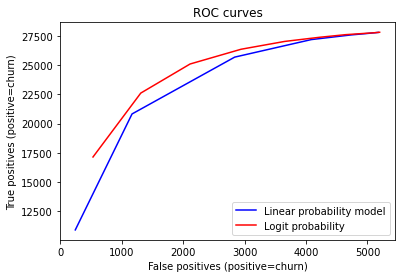

In [221]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name].astype(float))


# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

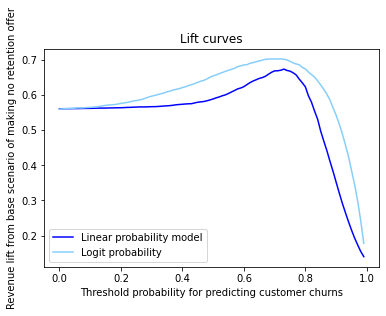

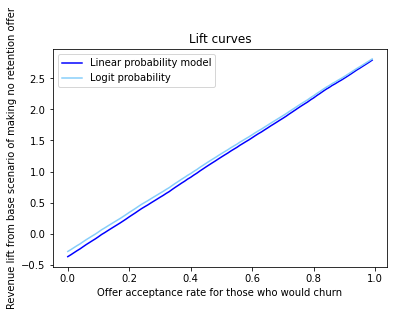

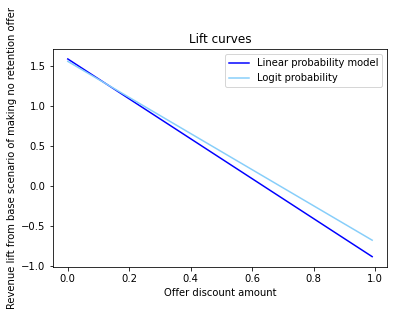

In [259]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.73
discount_amount = 0.4
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'lightskyblue')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'lightskyblue')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'lightskyblue')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


In [230]:
df_test['price_no_offer'].value_counts()

0.00    27801
4.73     5198
Name: price_no_offer, dtype: int64

In [257]:
df_test['price_logit_offer'].value_counts()

0.000    19725
2.838    11729
4.730     1545
Name: price_logit_offer, dtype: int64

In [232]:
df_test['price_lpm_offer'].value_counts()

0.000    19549
2.838    12987
4.730      463
Name: price_lpm_offer, dtype: int64